# **Projeto_Desafio: Séries Temporais**

A consultoria FIAP STRATEGY LTDA. decidiu entrar no mercado de meteorologia e está montando uma equipe de dados apenas para esta finalidade.

Você já trabalha dentro de outro setor da empresa, responsável por assuntos econômicos, e por conta disso, o departamento decide te trazer com o objetivo de te ensinar sobre mais uma área de negócio, mas que você também consiga colaborar com os seus conhecimentos.

Para que você se sinta confortável com o novo desafio, foi lhe entregue um dataset que contém dados históricos da mudança climática na Índia, de 2014 à 2017 na cidade Delhi. 

Seu objetivo é acessar o dataset e utilizar técnicas aprendidas para analisar todos os componentes de séries temporais, mostrando sua têndencia, sazionalidade e ruídos. Além disso, faça um algoritimo preditivo em sua análise.

* **Carregar a Base de Dados**

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
df_path = "C:\\Users\\tamir\\OneDrive\\Área de Trabalho\\Pos-Tech Fase 2\\2.3.0 Análise de Séries Temporais\\DailyDelhiClimateTrain.csv"

In [25]:
dados = pd.read_csv(df_path)

In [26]:
dados.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [27]:
dados = dados.rename(columns={'meantemp': 'y', 'date': 'ds'})
dados.set_index('ds', inplace=True)

In [28]:
dados.columns

Index(['y', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [29]:
dados = dados.sort_index()

* **Identificação e Tratamento de Variaveis**

In [30]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   y             1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1+ KB


In [31]:
dados.shape

(1462, 4)

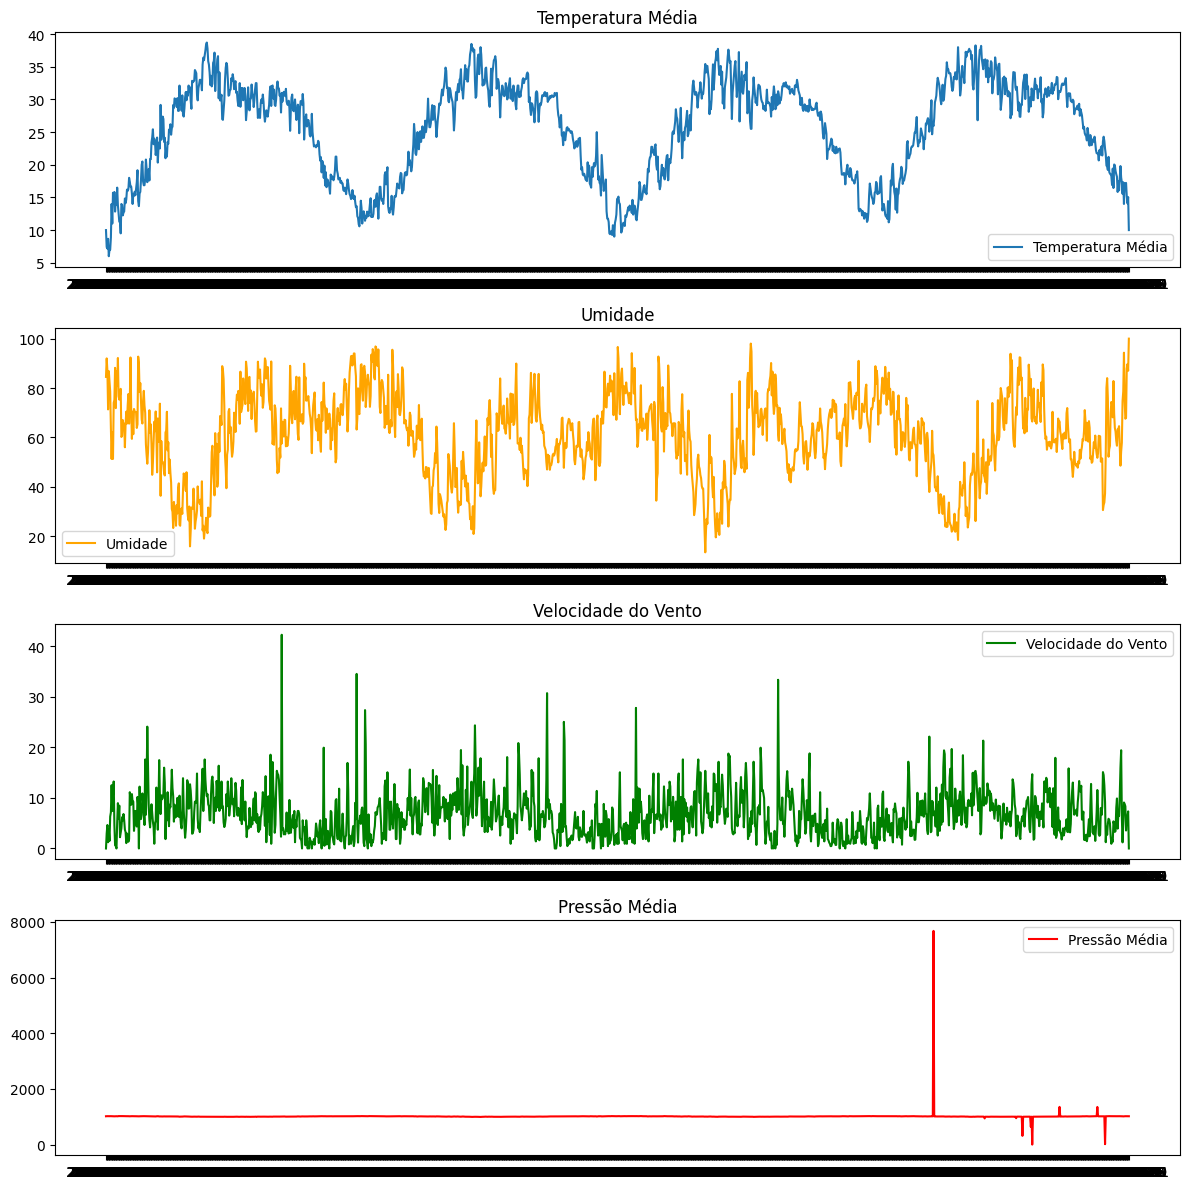

In [32]:
fig, axs = plt.subplots(4, 1, figsize=(12, 12))

axs[0].plot(dados.index, dados['y'], label='Temperatura Média')
axs[0].set_title('Temperatura Média')
axs[0].legend()

axs[1].plot(dados.index, dados['humidity'], label='Umidade', color='orange')
axs[1].set_title('Umidade')
axs[1].legend()

axs[2].plot(dados.index, dados['wind_speed'], label='Velocidade do Vento', color='green')
axs[2].set_title('Velocidade do Vento')
axs[2].legend()

axs[3].plot(dados.index, dados['meanpressure'], label='Pressão Média', color='red')
axs[3].set_title('Pressão Média')
axs[3].legend()

plt.tight_layout()
plt.show()

* **Decomposição da Série Temporal**

In [34]:
dados.index = pd.to_datetime(dados.index)
dados = dados.asfreq('D')

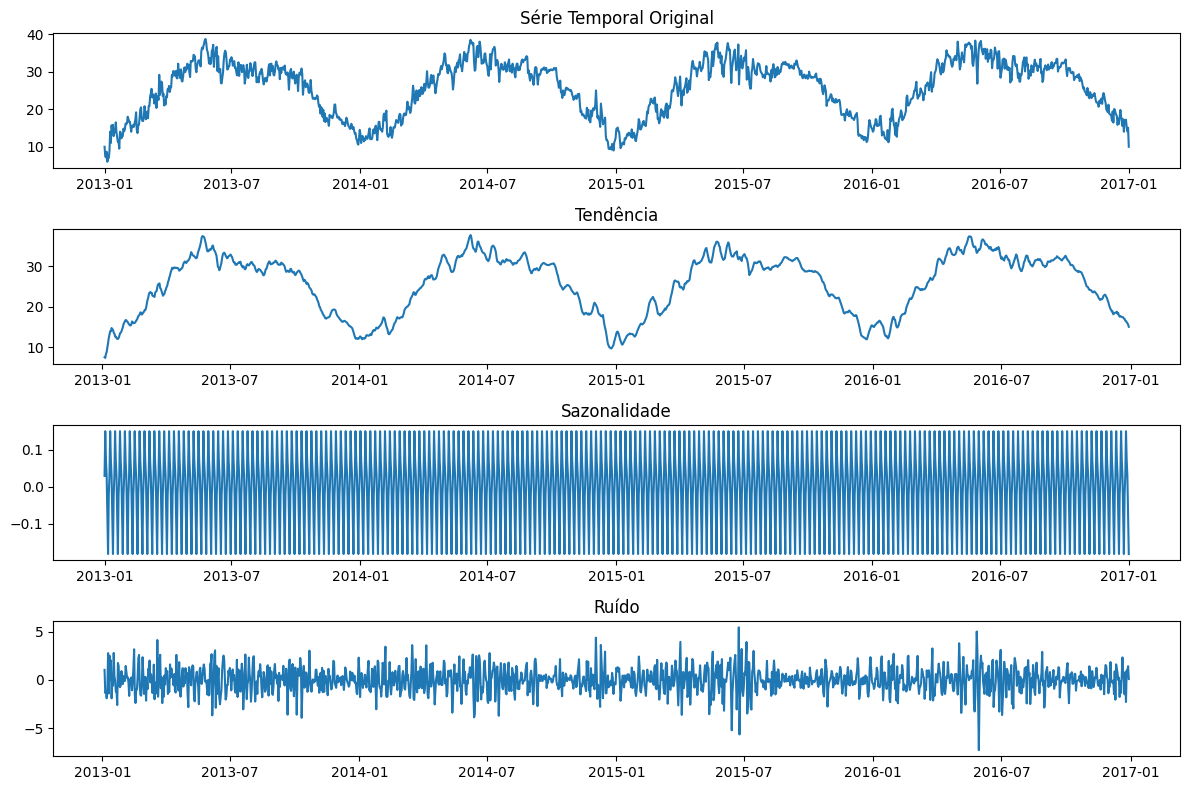

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompor a série temporal da temperatura média
decomposicao = seasonal_decompose(dados['y'], model='additive')

# Plotar os componentes
fig, axs = plt.subplots(4, 1, figsize=(12, 8))

axs[0].plot(dados['y'])
axs[0].set_title('Série Temporal Original')

axs[1].plot(decomposicao.trend)
axs[1].set_title('Tendência')

axs[2].plot(decomposicao.seasonal)
axs[2].set_title('Sazonalidade')

axs[3].plot(decomposicao.resid)
axs[3].set_title('Ruído')

plt.tight_layout()
plt.show()

* **Análise de Estacionaridade**

In [36]:
from statsmodels.tsa.stattools import adfuller

In [37]:
X = dados.y.values
result = adfuller(X)

print('Teste ADF')                                  
print(f'Teste Estatística: {result[0]}')           
print(f'P-value: {result[1]}')
print('Valores Críticos: ')

for key, value in result[4].items():
    print(f"\t{key}: {value}")

Teste ADF
Teste Estatística: -2.0210690559206714
P-value: 0.2774121372301609
Valores Críticos: 
	1%: -3.4348647527922824
	5%: -2.863533960720434
	10%: -2.567831568508802


*Conclusão:*

* *A hipótese nula do teste ADF é que a série não é estacionária.*
* *O p-valor é maior que 0.05 e a estatística do teste não é suficientemente baixa em comparação com os valores críticos de 1% e 5%, não rejeitamos a hipótese nula. Isso sugere que a série não é estacionária.*

* **Calcular a média móvel**

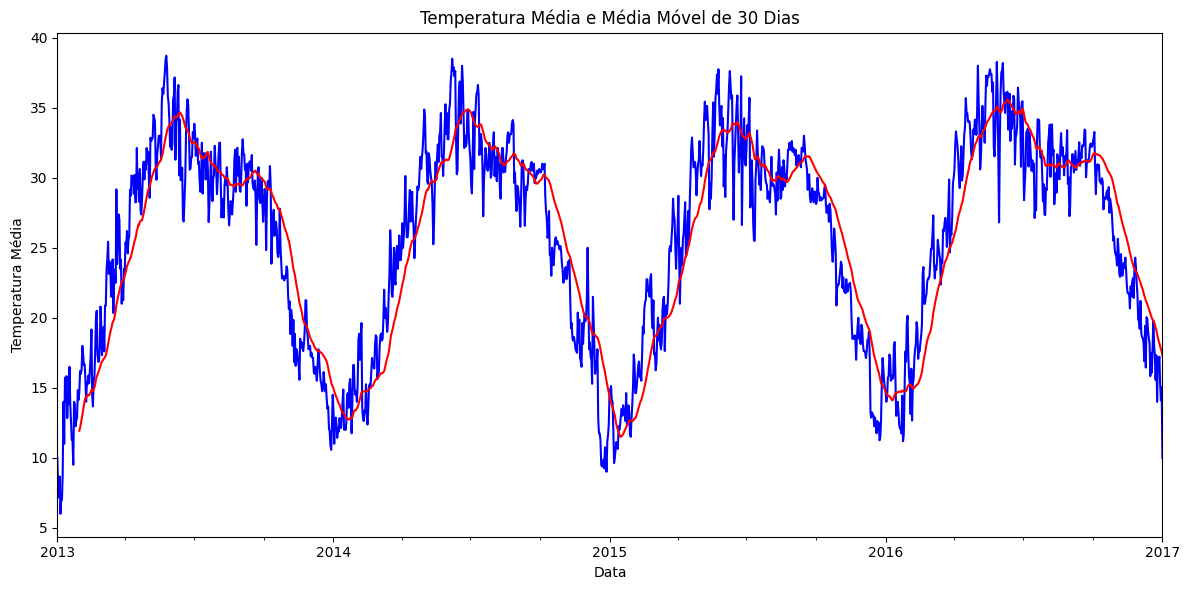

In [38]:
# Calcular a média móvel de 30 dias
ma = dados['y'].rolling(window=30).mean()


# Plotar os dados originais e a média móvel
f, ax = plt.subplots(figsize=(12, 6))  # Ajustar o tamanho conforme necessário

# Plotar a série temporal original
dados['y'].plot(ax=ax, label='Temperatura Média', color='blue')

# Plotar a média móvel
ma.plot(ax=ax, label='Média Móvel 30 dias', color='red')

# Ajustes finais no gráfico
ax.set_title('Temperatura Média e Média Móvel de 30 Dias')
ax.set_xlabel('Data')
ax.set_ylabel('Temperatura Média')
plt.tight_layout()

# Exibir o gráfico
plt.show()

* **Aplicar logaritmo à série temporal**

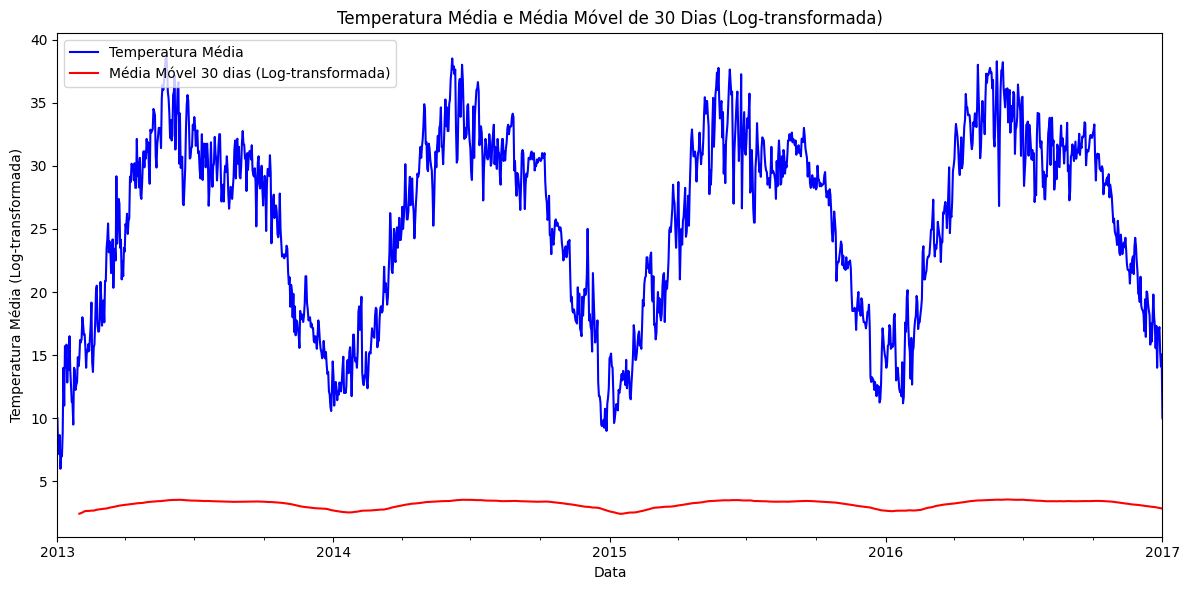

In [39]:
dados_log = np.log(dados['y'])
ma_log = dados_log.rolling(window=30).mean()

f, ax = plt.subplots(figsize=(12, 6))

# Plotar a série temporal original
dados['y'].plot(ax=ax, label='Temperatura Média', color='blue')

# Plotar a média móvel da série log-transformada
ma_log.plot(ax=ax, label='Média Móvel 30 dias (Log-transformada)', color='red')

# Ajustes finais no gráfico
ax.set_title('Temperatura Média e Média Móvel de 30 Dias (Log-transformada)')
ax.set_xlabel('Data')
ax.set_ylabel('Temperatura Média (Log-transformada)')
#ax.set_yscale('log')  # Utilizar escala logarítmica no eixo y, se desejado
plt.legend()
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [40]:
result_log = adfuller(dados_log.dropna())

print('Teste ADF (Log-transformada)')
print(f'Teste Estatística: {result_log[0]}')
print(f'P-value: {result_log[1]}')
print('Valores Críticos: ')
for key, value in result_log[4].items():
    print(f"\t{key}: {value}")

Teste ADF (Log-transformada)
Teste Estatística: -3.586511880904393
P-value: 0.006024189473988426
Valores Críticos: 
	1%: -3.43484922137066
	5%: -2.8635271063560412
	10%: -2.5678279184465946


*Conclusão:*

* *A estatística do teste é mais negativa que o valor crítico de 1%, indicando que há uma forte evidência para rejeitar a hipótese nula de que a série é não estacionária.*
* *O p-valor é menor que 0.05, o que também sugere que pode rejeitar a hipótese nula.*
* *Portanto, pode-se concluir que a série log-transformada de meantemp é estacionária.*

* **Plotando ACF e PACF**

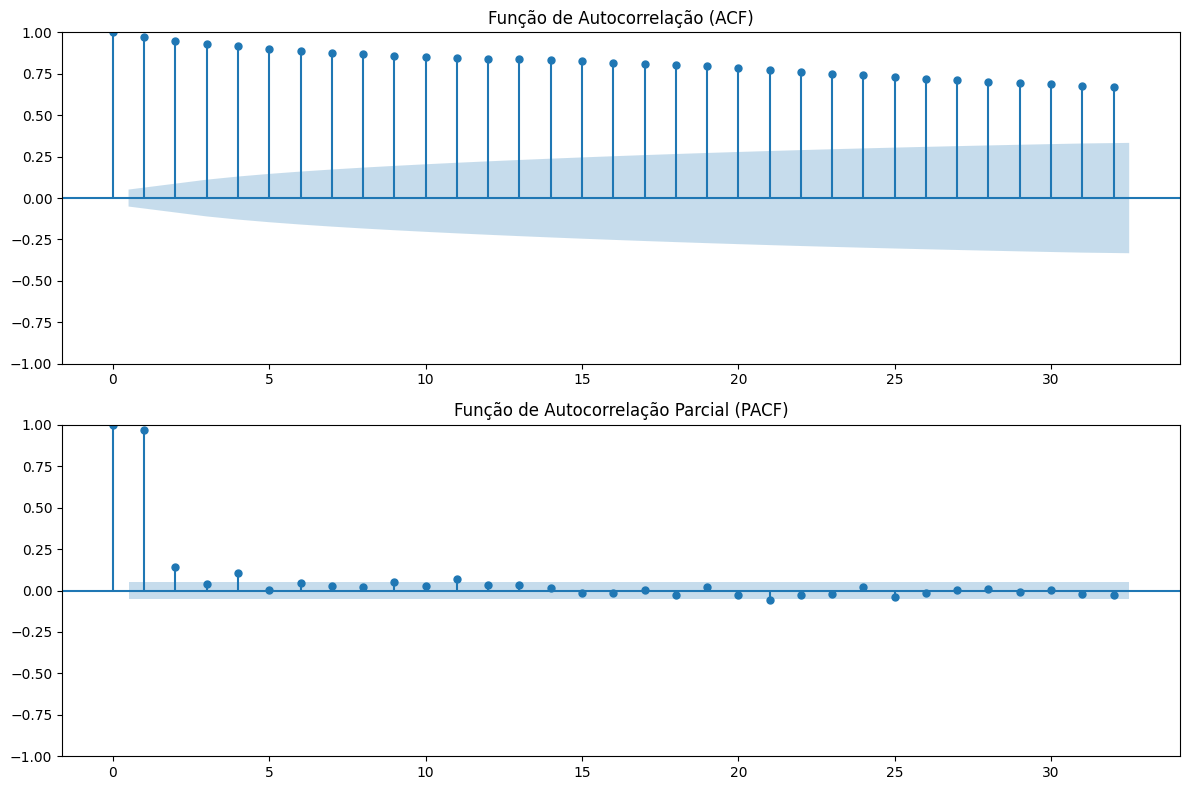

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Série log-transformada
dados_log = np.log(dados['y'])

# Plotar ACF e PACF
f, ax = plt.subplots(2, 1, figsize=(12, 8))

# ACF
plot_acf(dados_log.dropna(), ax=ax[0])
ax[0].set_title('Função de Autocorrelação (ACF)')

# PACF
plot_pacf(dados_log.dropna(), ax=ax[1])
ax[1].set_title('Função de Autocorrelação Parcial (PACF)')

plt.tight_layout()
plt.show()

Número de observações: 1462
Intervalo de Confiança Calculado: 0.05126044653466227


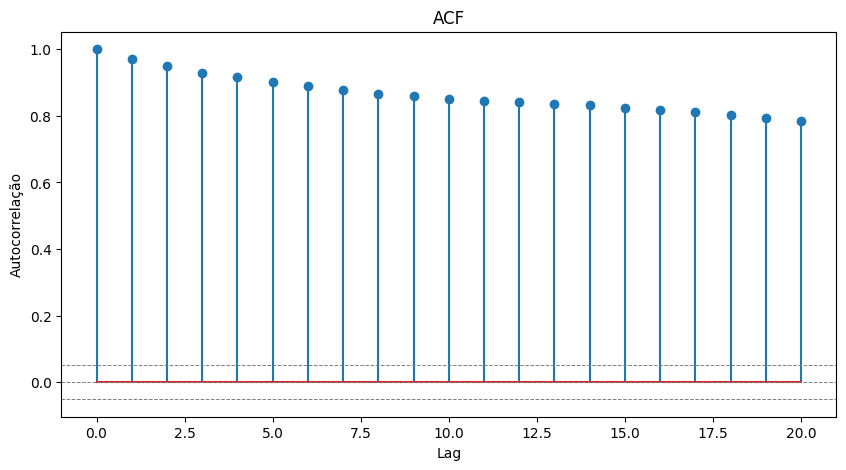

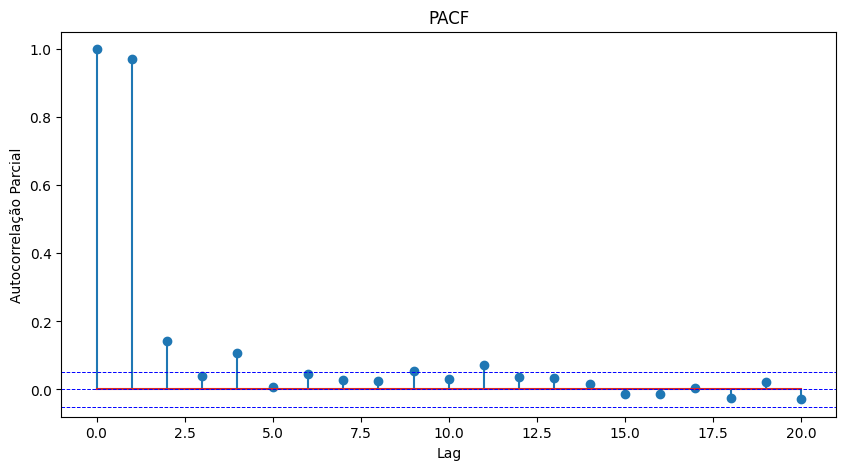

In [42]:
from statsmodels.tsa.stattools import acf, pacf

# Verificar o tamanho da série temporal
n = len(dados_log.dropna())
print(f"Número de observações: {n}")

# Cálculo da ACF e PACF com 25 lags
lag_acf = acf(dados_log.dropna(), nlags=20)
lag_pacf = pacf(dados_log.dropna(), nlags=20)

# Intervalo de confiança
conf_interval = 1.96 / np.sqrt(n)
print(f"Intervalo de Confiança Calculado: {conf_interval}")

# Plotar ACF
plt.figure(figsize=(10, 5))
plt.stem(lag_acf)
plt.axhline(y=-conf_interval, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=conf_interval, linestyle='--', color='gray', linewidth=0.7)
plt.title('ACF')
plt.xlabel('Lag')
plt.ylabel('Autocorrelação')
plt.show()

# Plotar PACF
plt.figure(figsize=(10, 5))
plt.stem(lag_pacf)
plt.axhline(y=-conf_interval, linestyle='--', color='blue', linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='blue', linewidth=0.7)
plt.axhline(y=conf_interval, linestyle='--', color='blue', linewidth=0.7)
plt.title('PACF')
plt.xlabel('Lag')
plt.ylabel('Autocorrelação Parcial')
plt.show()

In [43]:
dados_log_df = dados_log.reset_index()
dados_log_df.columns = ['ds', 'y']

In [44]:
dados_log_df.head()

,ds,y
0,2013-01-01,2.302585
1,2013-01-02,2.001480
2,2013-01-03,1.969441
3,2013-01-04,2.159484
4,2013-01-05,1.791759


* **Modelos: Naive e AutoArima**

In [79]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, AutoARIMA
from sklearn.metrics import mean_absolute_percentage_error

In [51]:
# Adicionar coluna 'unique_id'
dados_log_df['unique_id'] = 'series1'

In [65]:
treino = dados_log_df.loc[dados_log_df['ds'] < '2016-09-01']
valid = dados_log_df.loc[(dados_log_df['ds'] >= '2016-09-01') & (dados_log_df['ds'] < '2016-12-01')]

# Calcular o horizonte de previsão
horizon = valid['ds'].nunique()

print(f'Horizonte de Previsão: {horizon}')

Horizonte de Previsão: 91


c:\Users\tamir\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE: 3.97%


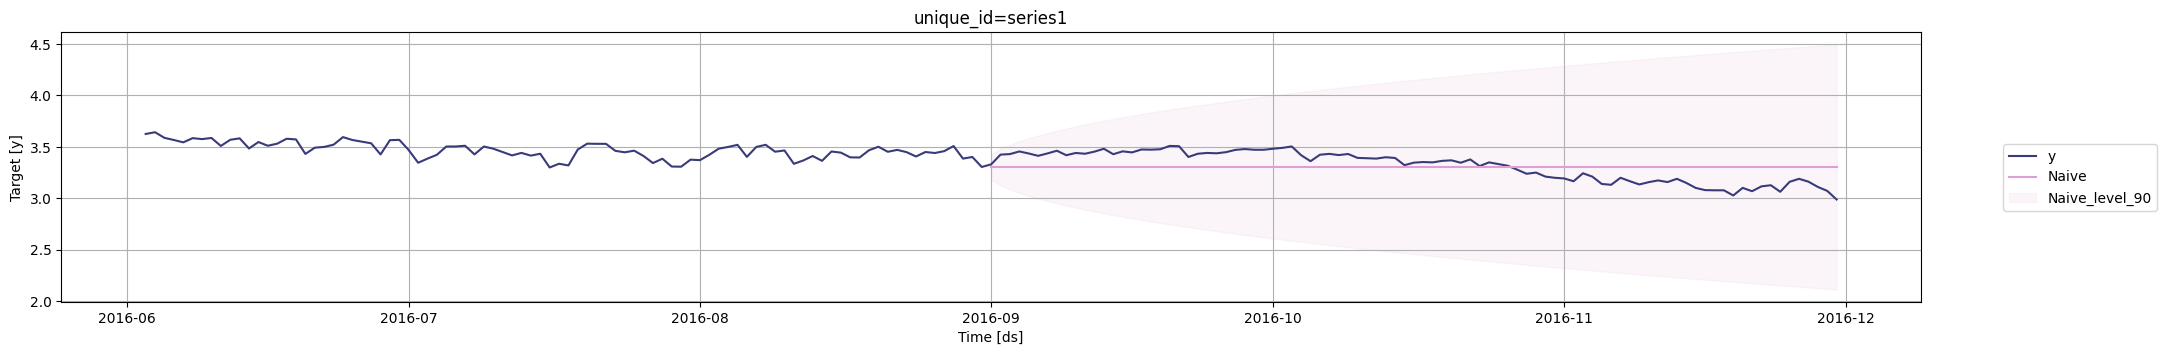

In [66]:

# Definir o modelo Naive
model_N = StatsForecast(models=[Naive()], freq='D', n_jobs=-1)

# Ajustar o modelo com os dados de treino
model_N.fit(treino, time_col='ds', target_col='y', id_col='unique_id')

# Realizar previsões
forecast_dfs = model_N.predict(h=horizon, level=[90])

# Resetar o índice e fazer o merge com os dados de validação
forecast_dfs = forecast_dfs.reset_index().rename(columns={forecast_dfs.columns[0]: 'ds'})
forecast_dfs = forecast_dfs.merge(valid[['ds', 'y', 'unique_id']], on=['ds', 'unique_id'], how='left')

# Calcular o WMAPE
def calculate_wmape(actual, forecast):
    return np.sum(np.abs(forecast - actual)) / np.sum(np.abs(actual))

wmape1 = calculate_wmape(forecast_dfs['y'].values, forecast_dfs['Naive'].values)
print(f'WMAPE: {wmape1:.2%}')

model_N.plot(treino, forecast_dfs, level=[90], engine="matplotlib", max_insample_length=90)


In [74]:
forecast_dfs

,unique_id,ds,Naive,Naive-lo-90,Naive-hi-90,y
0,series1,2016-09-01,3.305393,3.180631,3.430156,3.330775
1,series1,2016-09-02,3.305393,3.128953,3.481834,3.425536
2,series1,2016-09-03,3.305393,3.089298,3.521488,3.430586
3,series1,2016-09-04,3.305393,3.055868,3.554918,3.456074
4,series1,2016-09-05,3.305393,3.026416,3.584370,3.436466
...,...,...,...,...,...,...
86,series1,2016-11-26,3.305393,2.141687,4.469100,3.190234
87,series1,2016-11-27,3.305393,2.135018,4.475769,3.162786
88,series1,2016-11-28,3.305393,2.128387,4.482399,3.111493
89,series1,2016-11-29,3.305393,2.121793,4.488993,3.073208


In [64]:
model = ARIMA(dados_log_df['y'], order=(1, 1, 1))  
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1462
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1743.643
Date:                Mon, 12 Aug 2024   AIC                          -3481.285
Time:                        16:33:34   BIC                          -3465.425
Sample:                             0   HQIC                         -3475.369
                               - 1462                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5753      0.042     13.610      0.000       0.492       0.658
ma.L1         -0.7760      0.034    -22.673      0.000      -0.843      -0.709
sigma2         0.0054      0.000     48.478      0.0

WMAPE: 3.77%
MAPE: 3.89%


c:\Users\tamir\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


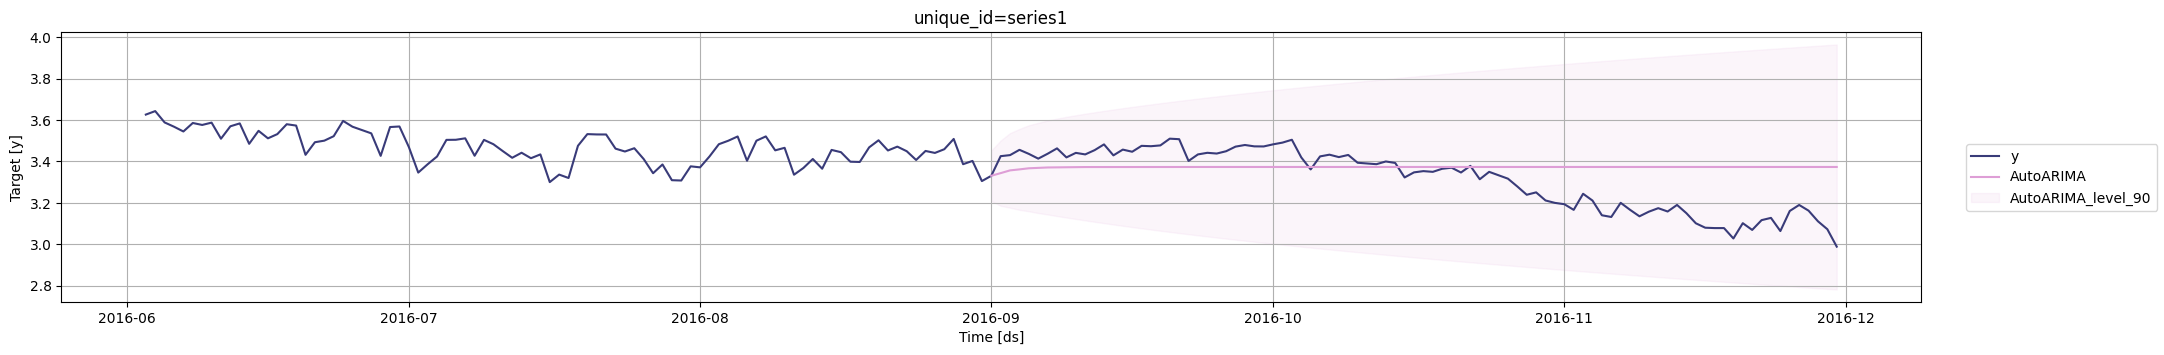

In [83]:

# Ajustar o modelo AutoARIMA
model_a = StatsForecast(models=[AutoARIMA(season_length=7)], freq='D', n_jobs=-1)

# Ajustar o modelo com os dados de treino
model_a.fit(treino, time_col='ds', target_col='y', id_col='unique_id')

# Realizar previsões
forecast_dfa = model_a.predict(h=horizon, level=[90])

# Resetar o índice e fazer o merge com os dados de validação
forecast_dfa = forecast_dfa.reset_index().rename(columns={forecast_dfa.columns[0]: 'ds'})
forecast_dfa = forecast_dfa.merge(valid[['ds', 'y', 'unique_id']], on=['ds', 'unique_id'], how='left')

# Definir a função para calcular o WMAPE
def calculate_wmape(actual, forecast):
    return np.sum(np.abs(forecast - actual)) / np.sum(np.abs(actual))

# Calcular o WMAPE
wmape2 = calculate_wmape(forecast_dfa['y'].values, forecast_dfa['AutoARIMA'].values)
print(f'WMAPE: {wmape2:.2%}')

mape = mean_absolute_percentage_error(forecast_dfa['y'], forecast_dfa['AutoARIMA'])
print(f'MAPE: {mape:.2%}')


model_a.plot(treino, forecast_dfa, level=[90], engine="matplotlib", max_insample_length=90)



In [73]:
forecast_dfa

,unique_id,ds,AutoARIMA,AutoARIMA-lo-90,AutoARIMA-hi-90,y
0,series1,2016-09-01,3.331029,3.209550,3.452509,3.330775
1,series1,2016-09-02,3.343708,3.186307,3.501109,3.425536
2,series1,2016-09-03,3.356972,3.176976,3.536968,3.430586
3,series1,2016-09-04,3.361752,3.166647,3.556858,3.456074
4,series1,2016-09-05,3.367113,3.159710,3.574516,3.436466
...,...,...,...,...,...,...
86,series1,2016-11-26,3.373407,2.794782,3.952031,3.190234
87,series1,2016-11-27,3.373407,2.791737,3.955076,3.162786
88,series1,2016-11-28,3.373407,2.788708,3.958105,3.111493
89,series1,2016-11-29,3.373407,2.785695,3.961118,3.073208


## **Análise de Dados Climáticos**

### *1. Visualização dos Dados*
* A visualização das variáveis climáticas, incluindo temperatura média, umidade, velocidade do vento e pressão média, mostrou variações significativas ao longo do tempo. As séries temporais de cada variável foram traçadas para proporcionar uma visão inicial das tendências e padrões gerais.

### *2. Decomposição da Série Temporal*
A decomposição da série temporal da temperatura média revelou os seguintes componentes:

* Tendência: A série temporal mostrou uma tendência geral ao longo do período analisado.

* Sazonalidade: Foram observados padrões sazonais na temperatura média, com variações previsíveis ao longo do ano.

* Ruído: A série também exibiu uma quantidade considerável de ruído, indicando variações aleatórias que não podem ser explicadas pela tendência ou sazonalidade.

### *3. Análise de Estacionaridade*

O teste de Dickey-Fuller aumentado (ADF) foi aplicado à série temporal da temperatura média:

* Teste ADF Original: Estatística de teste = -2.021; p-value = 0.277. O p-value maior que 0.05 sugere que a série original não é estacionária.
* Teste ADF após Log-transformação: Estatística de teste = -3.587; p-value = 0.006. A transformação logarítmica tornou a série estacionária, conforme indicado pelo p-value menor que 0.05.

### *4. Média Móvel*

* A média móvel de 30 dias foi calculada para suavizar a série temporal e evidenciar melhor as tendências de longo prazo. Esta técnica ajudou a visualizar a tendência subjacente da temperatura média, após a aplicação do logaritmo.

### *5. Análise de ACF e PACF*

*As funções de autocorrelação (ACF) e autocorrelação parcial (PACF) foram plotadas para identificar a estrutura de autocorrelação da série temporal. O número de observações foi de 1462, com um intervalo de confiança calculado de aproximadamente 0.051.

### *6. Modelos Preditivos*

* *Modelo Naive:* Utilizado como um modelo base com um WMAPE (Weighted Mean Absolute Percentage Error) de 3.97%. Este modelo assume que o valor futuro é igual ao valor mais recente.
* *Modelo SARIMAX*: Ajustado com parâmetros ARIMA (1, 1, 1) apresentou um WMAPE de 3.77% e um MAPE (Mean Absolute Percentage Error) de 3.89%. Este modelo incorporou componentes autoregressivos, de média móvel e diferenciação para capturar melhor as características sazonais e de tendência da série temporal.

### *Conclusão*

Os dados climáticos da cidade de Delhi mostram padrões sazonais claros e uma tendência geral. A transformação logarítmica foi eficaz para tornar a série temporal estacionária, o que é essencial para a modelagem preditiva. O modelo SARIMAX demonstrou um desempenho ligeiramente melhor em comparação com o modelo Naive, com erros de previsão menores. Isso sugere que o modelo SARIMAX é mais adequado para prever a temperatura média com base nos dados históricos disponíveis.

A análise também destacou a importância de considerar a sazonalidade e a tendência ao modelar séries temporais climáticas para obter previsões mais precisas.